<a href="https://colab.research.google.com/github/Yacarta/Ai_Python1900/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BE%D0%B1%D1%80%D0%BE%D0%B1%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85%20v2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Used%20Car%20Dataset.csv", index_col="Unnamed: 0")
#df.drop(columns=['car_name', 'registration_year', 'ownsership', 'transmission'], inplace=True)

In [60]:
#df['ID']=range(len(df))

Дані про ціни вживаних автомобілів у Індії
* car_name - назва авто у форматі 'рік компанія основна назва'
* registration_year - місяць та рік реєстрації
* ownsership - кількість власників у форматі 'Second owner'
* transmission - тип коробки передач
* insurance_validity - тип страховки
* fuel_type - вид палива
* seats - кількість сидінь
* kms_driven - пробіг
* manufacturing_year - рік виробництва, має тип object, потрібно застосувати astype(int)
* mileage(kmpl) - скільки кілометрів проїде за літр палива
* engine(cc) - об'єм двигуна у мл
* max_power(bhp) - потужність у кінських силах
* torque(Nm) - крутний момент двигуна
* price(in lakhs) - ціна у сто тисяч рупій

[Повний аналіз даних](https://www.kaggle.com/code/abdelrasoul/used-cars-prices-prediction)

In [61]:
df.head()

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),ID
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,0
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,1
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,2
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,3
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,4


# Завдання 1
Виведіть інформацію про таблицю(кількість рядків та стовпчиків та типи даних). Також виведіть кількість пропущених значень по стовпчиках

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1553 non-null   object 
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownsership          1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1550 non-null   float64
 10  engine(cc)          1550 non-null   float64
 11  max_power(bhp)      1550 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price(in lakhs)     1553 non-null   float64
 14  ID                  1553 non-null   int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 194.1+ KB


In [63]:
df.isnull().sum()

,0
car_name,0
registration_year,0
insurance_validity,0
fuel_type,0
seats,0
kms_driven,0
ownsership,0
transmission,0
manufacturing_year,0
mileage(kmpl),3


# Завдання 2
Виведіть гістограми для всіх числових стовпчиків

In [64]:
df.select_dtypes(include = 'number')

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),ID
0,5,56000,7.81,2996.0,2996.0,333.0,63.75,0
1,5,30615,17.40,999.0,999.0,9863.0,8.99,1
2,5,24000,20.68,1995.0,1995.0,188.0,23.75,2
3,5,18378,16.50,1353.0,1353.0,13808.0,13.56,3
4,5,44900,14.67,1798.0,1798.0,17746.0,24.00,4
...,...,...,...,...,...,...,...,...
1548,5,35000,1493.00,11345.0,11345.0,250.0,17.41,1548
1549,5,10000,999.00,6706.0,6706.0,91.0,3.98,1549
1550,5,49000,17.50,1199.0,1199.0,887.0,5.85,1550
1551,5,40000,18.78,999.0,999.0,75.0,4.75,1551


In [65]:
columns = df.select_dtypes(include = 'number').columns

In [66]:
import matplotlib.pyplot as plt

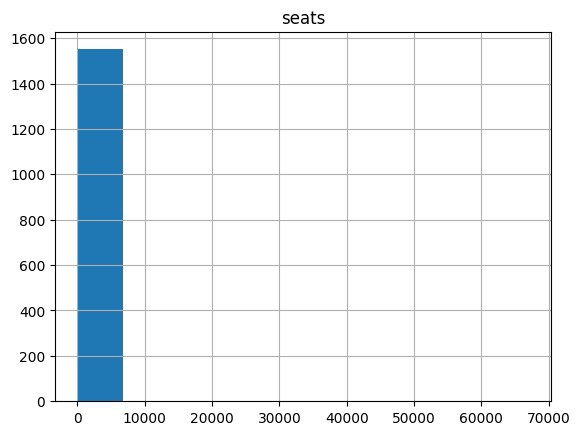

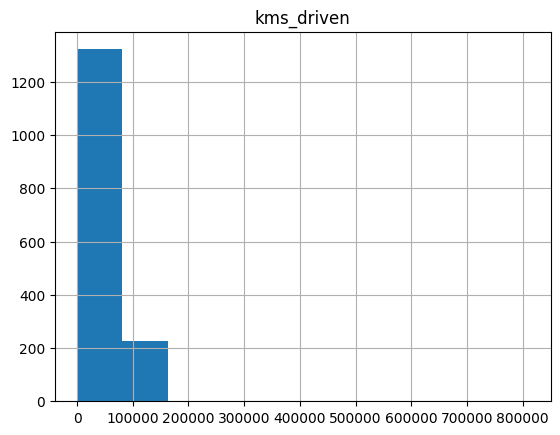

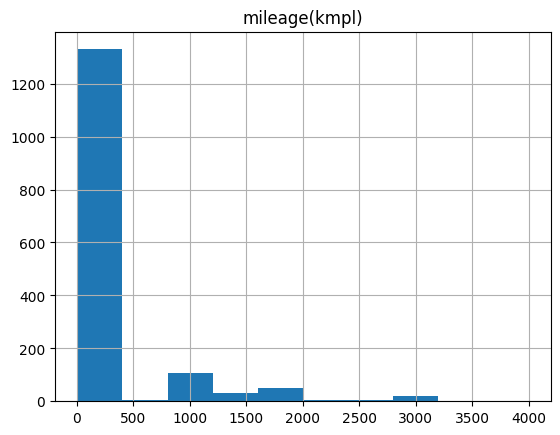

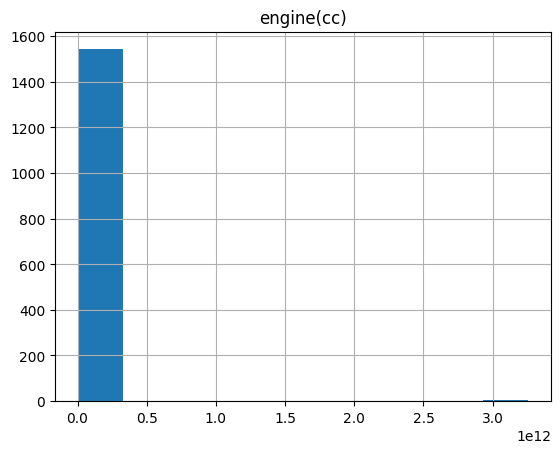

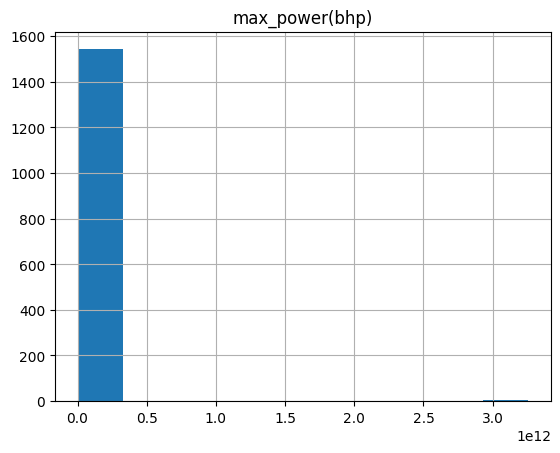

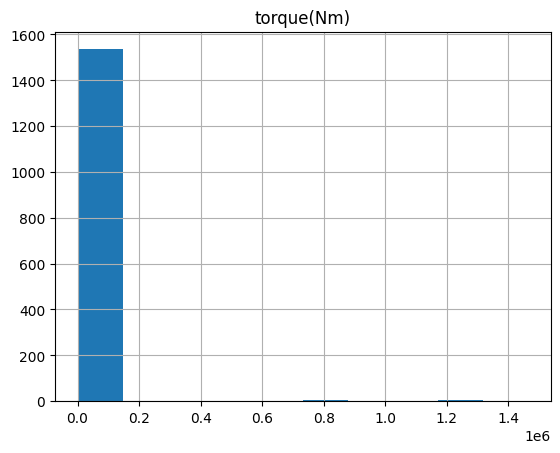

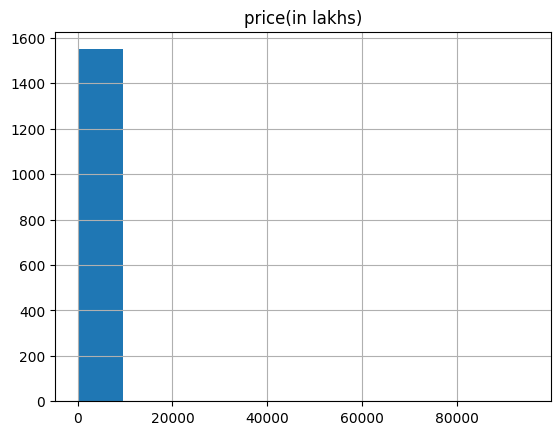

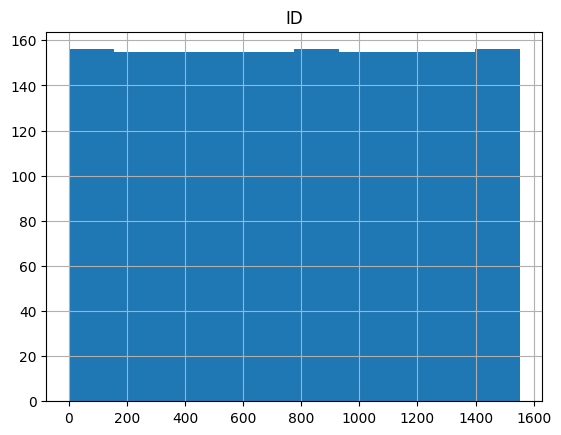

In [67]:
for column in columns:
  histogram = df[column]
  histogram.hist()
  plt.title(column)
  plt.show()

# Завдання 3
Виведіть ящик з вусами для всіх числових стовпчиків. Де потрібно очистіть викиди

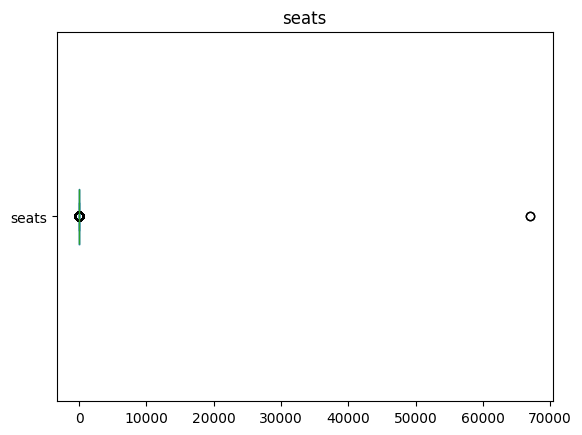

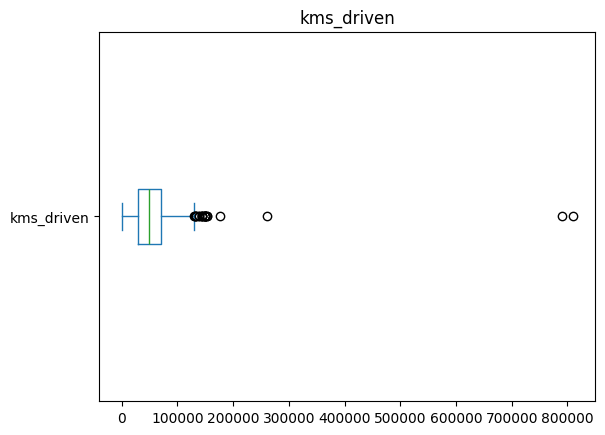

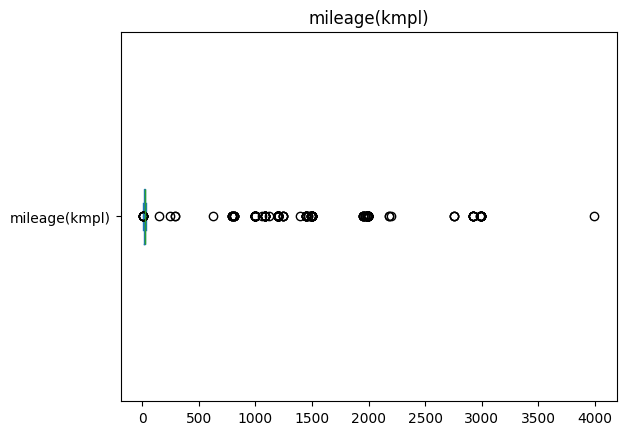

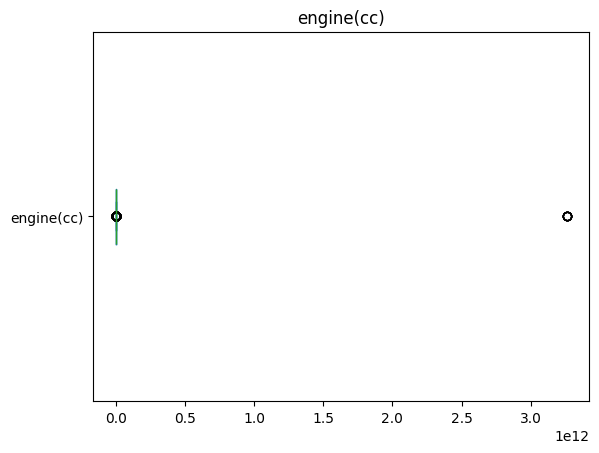

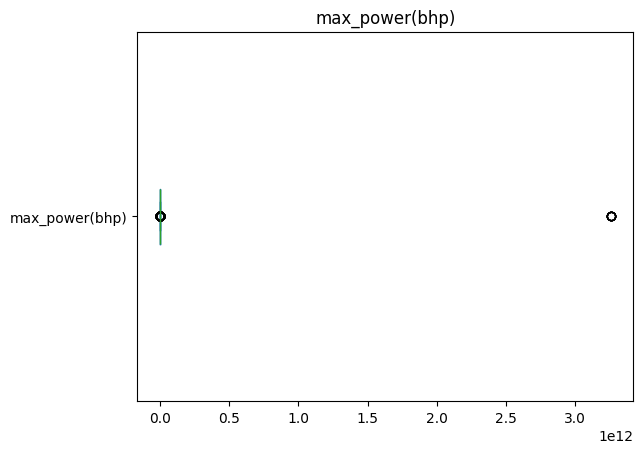

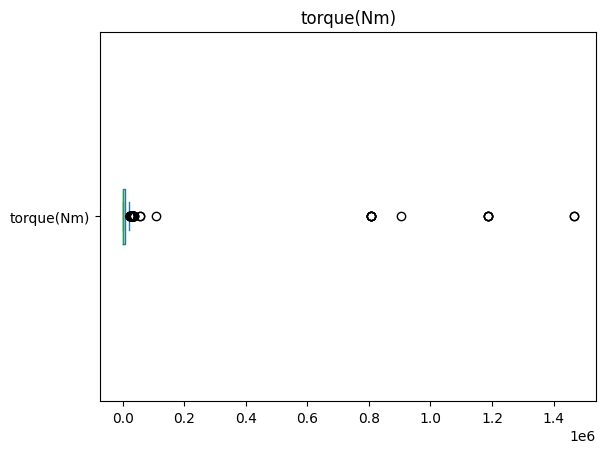

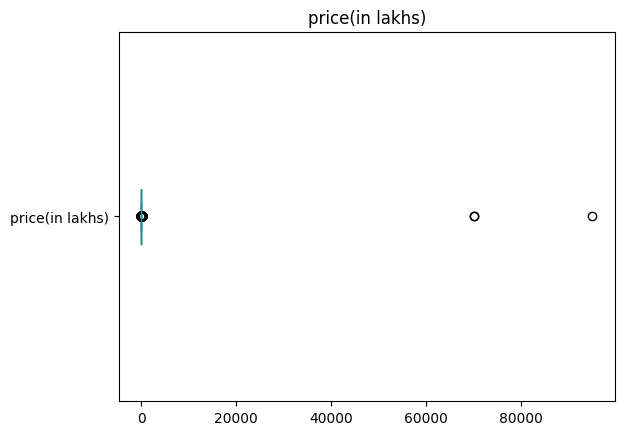

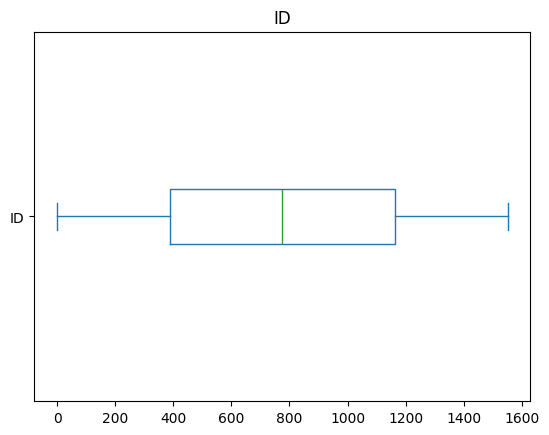

In [68]:
for column in columns:
  histogram = df[column]
  histogram.plot(kind='box', vert=False)
  plt.title(column)
  plt.show()

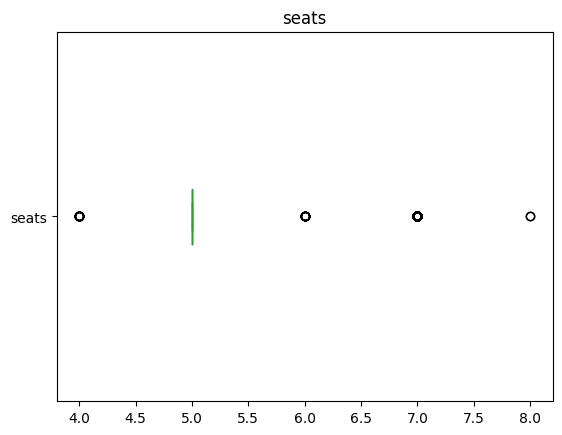

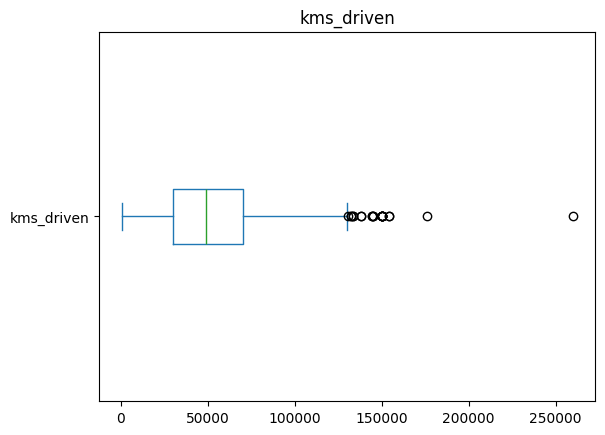

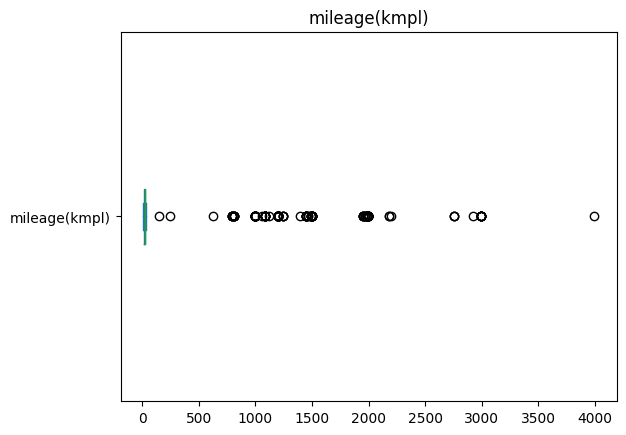

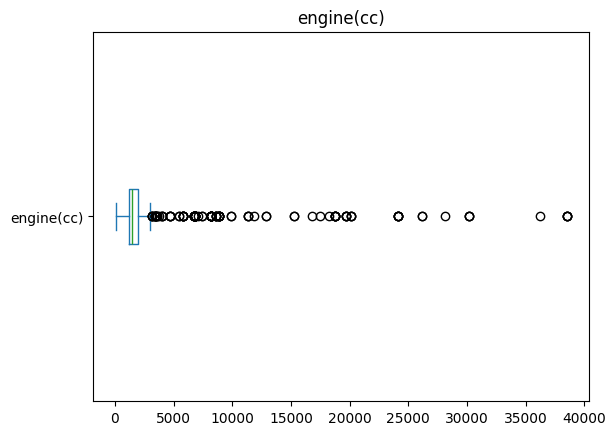

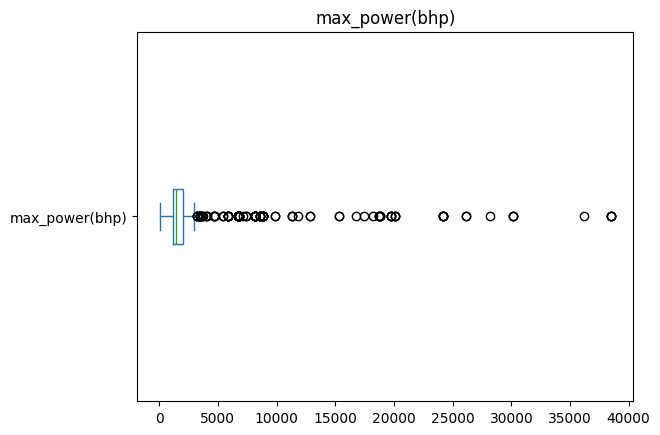

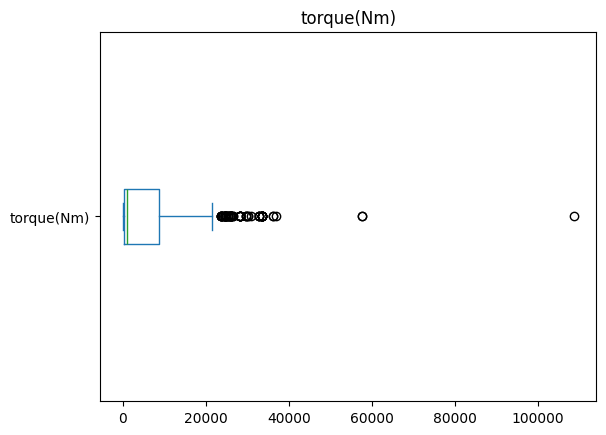

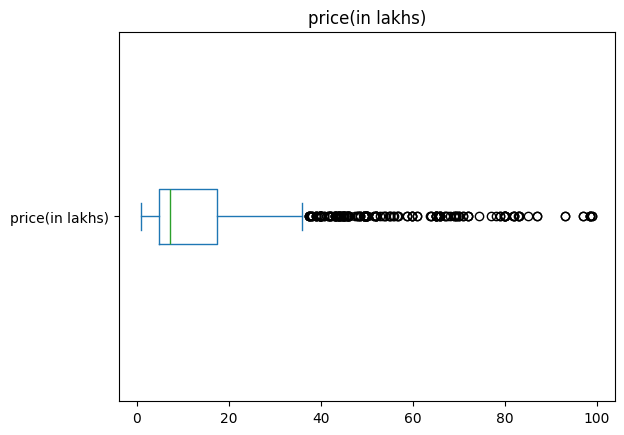

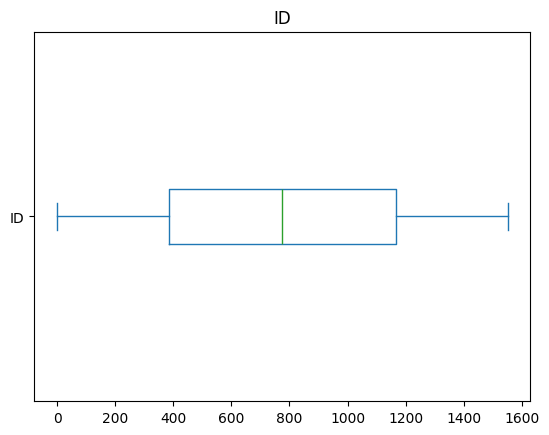

In [69]:
mask = df['seats'] < 10000
df = df[mask]

mask = df['kms_driven'] < 700000
df = df[mask]

mask = df['engine(cc)'] < 1 * 1e6
df = df[mask]

mask = df['torque(Nm)'] < 0.6 * 1e6
df = df[mask]

mask = df['price(in lakhs)'] < 60000
df = df[mask]

for column in columns:
  histogram = df[column]
  histogram.plot(kind='box', vert=False)
  plt.title(column)
  plt.show()

Розділіть дані на тестові та тренувальні(цільова ознака price(in lakhs))

In [70]:
y = df['price(in lakhs)']
X = df.drop(columns='price(in lakhs)')

In [71]:
y

,price(in lakhs)
0,63.75
1,8.99
2,23.75
3,13.56
4,24.00
...,...
1548,17.41
1549,3.98
1550,5.85
1551,4.75


In [72]:
X

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),ID
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,0
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,1
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,2
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,3
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,1548
1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,1549
1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,1550
1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,1551


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

Створіть препроцесор для заповнення пропусків та натренуйте його


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1520 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1520 non-null   object 
 1   registration_year   1520 non-null   object 
 2   insurance_validity  1520 non-null   object 
 3   fuel_type           1520 non-null   object 
 4   seats               1520 non-null   int64  
 5   kms_driven          1520 non-null   int64  
 6   ownsership          1520 non-null   object 
 7   transmission        1520 non-null   object 
 8   manufacturing_year  1520 non-null   object 
 9   mileage(kmpl)       1520 non-null   float64
 10  engine(cc)          1520 non-null   float64
 11  max_power(bhp)      1520 non-null   float64
 12  torque(Nm)          1520 non-null   float64
 13  price(in lakhs)     1520 non-null   float64
 14  ID                  1520 non-null   int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 190.0+ KB


In [97]:
num_df = df.select_dtypes(include='number')
q1 = num_df.quantile(q=0.25)
q3 = num_df.quantile(q=0.75)

iqr = q3 - q1

lower = q1 - 3*iqr
upper = q3 + 3*iqr

mask = (num_df > lower) & (num_df < upper)

mask = mask.all(axis=1)
mask.sum()
mask

,0
0,False
1,False
2,False
3,False
4,False
...,...
1548,False
1549,False
1550,False
1551,False


# Завдання 4
Створіть Pipeline для обробки даних

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [100]:
numbers = X_train.select_dtypes(include='number').columns
categories = X_train.select_dtypes(include='object').columns

In [101]:
numbers_transformer = Pipeline([
  ('n/a', SimpleImputer(strategy='median'))
])
numbers_transformer

Pipeline(steps=[('n/a', SimpleImputer(strategy='median'))])

In [102]:
categories_transformer = Pipeline([
  ('n/a', SimpleImputer(strategy='constant', fill_value='n/a')),
  ('encode', OrdinalEncoder(handle_unknown='use_encoded_value',
                                      unknown_value=-1)),

])
categories_transformer

Pipeline(steps=[('n/a', SimpleImputer(fill_value='n/a', strategy='constant')),
                ('encode',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1))])

In [103]:
preprocess = ColumnTransformer([
    ('numbers', numbers_transformer, numbers),
    ('categories', categories_transformer, categories)
])
preprocess.set_output(transform='pandas')
preprocess

ColumnTransformer(transformers=[('numbers',
                                 Pipeline(steps=[('n/a',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'ID'],
      dtype='object')),
                                ('categories',
                                 Pipeline(steps=[('n/a',
                                                  SimpleImputer(fill_value='n/a',
                                                                strategy='constant')),
                                                 ('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 Index(['car_name', 'registration_year', 'insurance_validity', 'fuel_type',
       'ownsership', 'transmission', 'manufacturing_year'],
      dtype='object'))])

In [104]:
preprocess.fit(X_train)

ColumnTransformer(transformers=[('numbers',
                                 Pipeline(steps=[('n/a',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'ID'],
      dtype='object')),
                                ('categories',
                                 Pipeline(steps=[('n/a',
                                                  SimpleImputer(fill_value='n/a',
                                                                strategy='constant')),
                                                 ('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 Index(['car_name', 'registration_year', 'insurance_validity', 'fuel_type',
       'ownsership', 'transmission', 'manufacturing_year'],
      dtype='object'))])

In [105]:
x_train_prep = preprocess.transform(X_train)
x_train_prep

,numbers__seats,numbers__kms_driven,numbers__mileage(kmpl),numbers__engine(cc),numbers__max_power(bhp),numbers__torque(Nm),numbers__ID,categories__car_name,categories__registration_year,categories__insurance_validity,categories__fuel_type,categories__ownsership,categories__transmission,categories__manufacturing_year
1453,5.0,22873.0,20.30,1086.0,1086.0,6805.0,1453.0,671.0,117.0,0.0,2.0,15.0,10.0,13.0
1108,5.0,80000.0,20.30,1248.0,1248.0,75.0,1108.0,7.0,2.0,3.0,1.0,17.0,10.0,2.0
1466,5.0,72793.0,23.59,1364.0,1364.0,6704.0,1466.0,262.0,70.0,0.0,1.0,15.0,10.0,8.0
111,5.0,45084.0,20.50,1582.0,1582.0,1262.0,111.0,399.0,35.0,0.0,1.0,15.0,10.0,10.0
1324,5.0,23329.0,22.50,999.0,999.0,67.0,1324.0,278.0,140.0,0.0,2.0,15.0,10.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,5.0,76792.0,20.73,1373.0,1373.0,911.0,1156.0,241.0,22.0,0.0,2.0,15.0,10.0,8.0
1323,5.0,65341.0,25.20,1248.0,1248.0,74.0,1323.0,118.0,150.0,0.0,1.0,15.0,10.0,6.0
877,5.0,71070.0,19.60,1461.0,1461.0,10845.0,877.0,480.0,154.0,0.0,1.0,15.0,9.0,10.0
1490,5.0,30000.0,18.76,1462.0,1462.0,10326.0,1490.0,717.0,88.0,4.0,2.0,15.0,9.0,13.0


In [106]:
x_test_prep = preprocess.transform(X_test)
x_test_prep

,numbers__seats,numbers__kms_driven,numbers__mileage(kmpl),numbers__engine(cc),numbers__max_power(bhp),numbers__torque(Nm),numbers__ID,categories__car_name,categories__registration_year,categories__insurance_validity,categories__fuel_type,categories__ownsership,categories__transmission,categories__manufacturing_year
468,5.0,74846.0,18.90,1197.0,1197.0,82.0,468.0,101.0,95.0,0.0,2.0,16.0,10.0,6.0
1344,5.0,27012.0,21.21,1197.0,1197.0,8180.0,1344.0,-1.0,156.0,0.0,2.0,15.0,10.0,12.0
1503,5.0,1800.0,20.36,1197.0,1197.0,789.0,1503.0,67.0,43.0,0.0,2.0,15.0,10.0,5.0
759,7.0,75000.0,14.75,2967.0,2967.0,245.0,759.0,198.0,83.0,3.0,1.0,16.0,9.0,8.0
249,5.0,54000.0,15.80,1997.0,1997.0,247.0,249.0,431.0,141.0,3.0,2.0,16.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,5.0,32000.0,1995.00,188.0,188.0,400.0,235.0,276.0,9.0,3.0,1.0,7.0,4.0,16.0
491,5.0,9000.0,12.10,1998.0,1998.0,26530.0,491.0,781.0,63.0,3.0,2.0,15.0,9.0,15.0
198,5.0,27200.0,13.50,2925.0,2925.0,28161.0,198.0,-1.0,-1.0,0.0,1.0,15.0,9.0,11.0
1306,5.0,48341.0,22.05,796.0,796.0,4733.0,1306.0,-1.0,129.0,0.0,2.0,15.0,10.0,11.0


Завдання 4
Створіть LightGBM та натренуйте його


In [107]:
import lightgbm as lgbm

model = lgbm.LGBMRegressor(objective='mse',
                           n_estimators=200,
                           learning_rate=0.1
                           )

In [108]:
model.fit(x_train_prep, y_train,
          eval_set=[(x_train_prep, y_train),
                    (x_test_prep, y_test)],
          eval_names=['train', 'test'],
          eval_metric=['mae'])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1601
[LightGBM] [Info] Number of data points in the train set: 1216, number of used features: 14
[LightGBM] [Info] Start training from score 14.909934


LGBMRegressor(n_estimators=200, objective='mse')

In [109]:
y_train_pred = model.predict(x_train_prep)
y_train_pred

array([ 4.97399757,  1.39152291,  4.25724714, ...,  7.48651301,
       11.484366  ,  9.43427138])

In [110]:
y_train
error = y_train- y_train_pred
error

,price(in lakhs)
1453,-0.243998
1108,-0.391523
1466,0.292753
111,-0.136342
1324,-0.200270
...,...
1156,0.158669
1323,-0.527138
877,-0.266513
1490,-0.084366


In [111]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [112]:
#all_metrics = pd.DataFrame()

y_pred = model.predict(x_train_prep)
all_metrics['bad data train'] = get_metrics(y_train, y_pred)

y_pred = model.predict(x_test_prep)
all_metrics['bad data test'] = get_metrics(y_test, y_pred)

all_metrics

,train with mse,test with mse,bad data train,bad data test
MAE,0.85,3.45,0.85,3.45
MSE,5.05,68.92,5.05,68.92
RMSE,2.25,8.30,2.25,8.30
R2,0.98,0.81,0.98,0.81


In [90]:
model.evals_result_

{'train': OrderedDict([('l1',
               [np.float64(11.433687179515621),
                np.float64(10.49248824908978),
                np.float64(9.662249828254616),
                np.float64(8.939749019464651),
                np.float64(8.298196685777087),
                np.float64(7.746202621173486),
                np.float64(7.22096927438664),
                np.float64(6.75656767989092),
                np.float64(6.321914910507375),
                np.float64(5.932597616988309),
                np.float64(5.5706191689813656),
                np.float64(5.24604303484079),
                np.float64(4.952262683631452),
                np.float64(4.699002320289644),
                np.float64(4.457110794844871),
                np.float64(4.220458018981154),
                np.float64(4.0139810704197),
                np.float64(3.8411672148760743),
                np.float64(3.6834689359605486),
                np.float64(3.539055563447294),
                np.float64(3.40

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

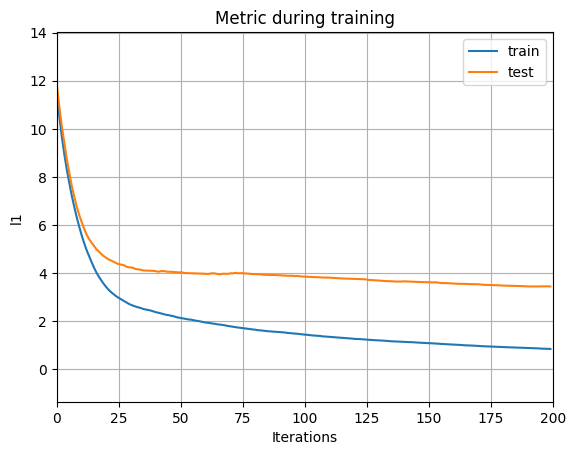

In [91]:
lgbm.plot_metric(model,
                 metric='l1') # mae

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

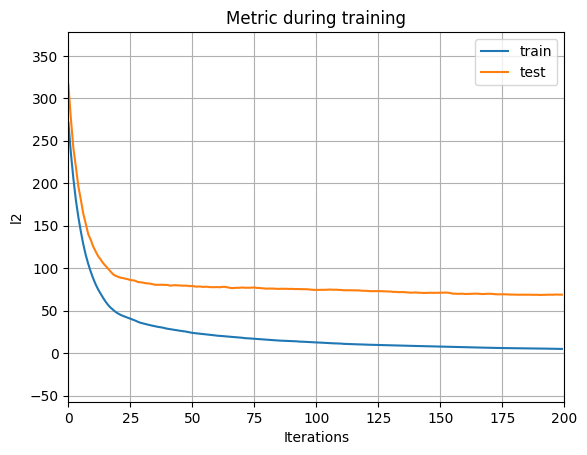

In [92]:
lgbm.plot_metric(model,
                 metric='l2') # mse

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

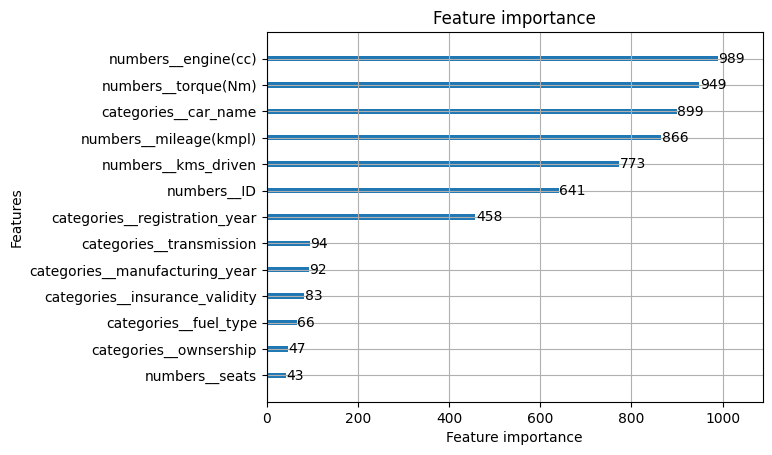

In [93]:
lgbm.plot_importance(model)